## This notebook is for plotting violin plots of the total sediment basket weights a GSD 

Importing the data:

In [44]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data
spring = pd.read_csv('spring2023_GSD.csv')
summer = pd.read_csv('summer2023_GSD.csv')

In [45]:
# Melt your DataFrame to long format
df_melted = spring.melt(id_vars='Size', var_name='Sample', value_name='Percentage')
# Create a new DataFrame for total weights
spring_weights = spring[spring['Size'].isin(['WEIGHT'])].melt(id_vars='Size', var_name='Sample', value_name='Weight')
summer_weights = summer[summer['Size'].isin(['WEIGHT'])].melt(id_vars='Size', var_name='Sample', value_name='Weight')
# Merge the two DataFrames
df_final = pd.merge(df_melted, spring_weights, on='Sample')

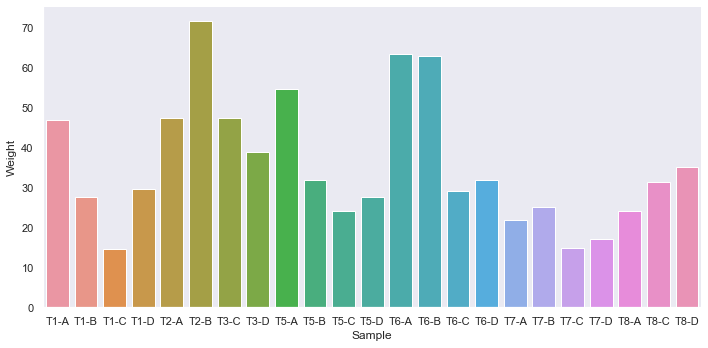

In [46]:
# simple bar plot of the data
sns.catplot(data=spring_weights, x='Sample', y='Weight', kind='bar', height=5, aspect=2)
plt.show()

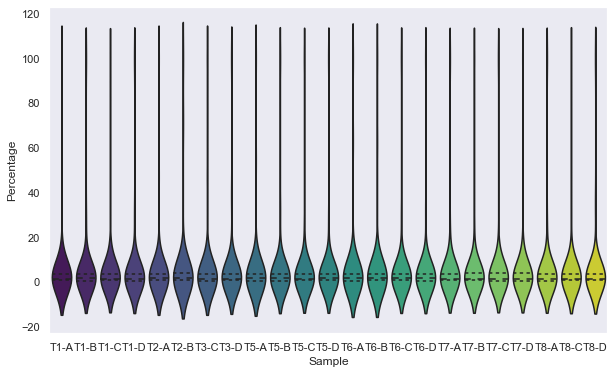

In [47]:

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sample', y='Percentage', data=df_final, scale='width', inner='quart', split=True, linewidth=1.5, palette='viridis')

# Adjust y limit to total weight of the samples
#plt.ylim(0, df_final['Weight'].max())


plt.show()

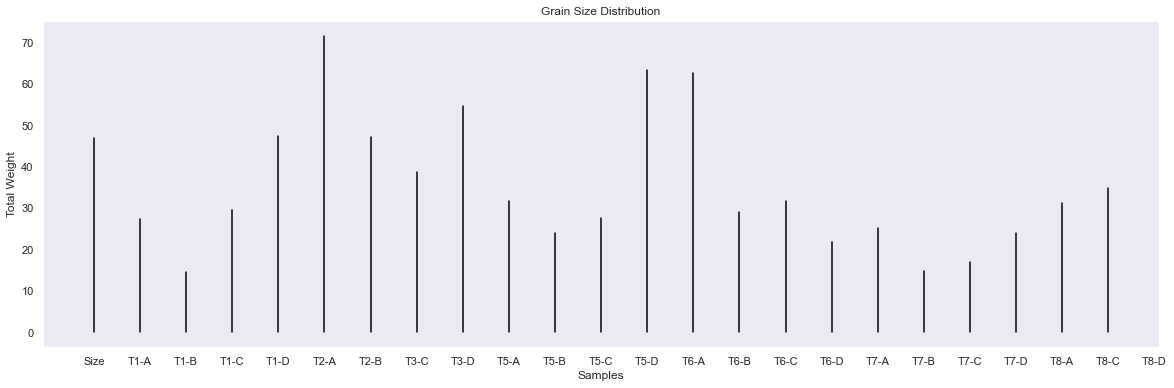

In [48]:
df = spring

# Extract grain size distribution
grain_sizes = df.iloc[:-2]

# Set up plot
fig, ax = plt.subplots(figsize=(20, 6))

# Plot vertical lines
for i, weight in enumerate(weights['Weight']):
    ax.plot([i, i], [0, weight], color='black')

# Set labels and title
ax.set_xlabel('Samples')
ax.set_ylabel('Total Weight')
ax.set_title('Grain Size Distribution')

# Set x-axis ticks and labels
ax.set_xticks(range(len(grain_sizes.columns)))
ax.set_xticklabels(grain_sizes.columns)

plt.show()

<AxesSubplot: xlabel='day', ylabel='total_bill'>

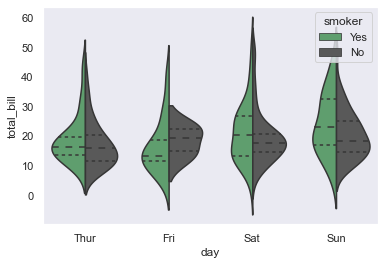

In [49]:
import seaborn as sns
sns.set_theme(style="dark")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
            split=True, inner="quart", fill=False,
            palette={"Yes": "g", "No": ".35"})

Testing stuff

In [50]:
# get spring data
test = spring.iloc[:, 0:5]
num_points = 1000
samples = []

for basket in test.columns:
    if basket != 'Size':
        test[basket+'_quantity'] = test[basket] * num_points
        repeated_values = np.repeat(test['Size'][:-2], test[basket+'_quantity'][:-2])
        basket_ids = [basket] * len(repeated_values)
        samples.append(pd.DataFrame({
            'value': repeated_values,
            'basket_id': basket_ids
        }))

# concatenate all the df in the list into a single spring dataframe
samples_spring = pd.concat(samples, ignore_index=True)
samples_spring['season'] = 'spring' 

In [51]:
# do the same for the summer
test = summer.iloc[:, 0:5]
num_points = 1000
samples = []

for basket in test.columns:
    if basket != 'Size':
        test[basket+'_quantity'] = test[basket] * num_points
        repeated_values = np.repeat(test['Size'][:-2], test[basket+'_quantity'][:-2])
        basket_ids = [basket] * len(repeated_values)
        samples.append(pd.DataFrame({
            'value': repeated_values,
            'basket_id': basket_ids
        }))

# concatenate all the df in the list into a single summer dataframe
samples_summer = pd.concat(samples, ignore_index=True)
samples_summer['season'] = 'summer' 

In [52]:
# concatenate the two dataframes
samples = pd.concat([samples_spring, samples_summer], ignore_index=True)

<function matplotlib.pyplot.show(close=None, block=None)>

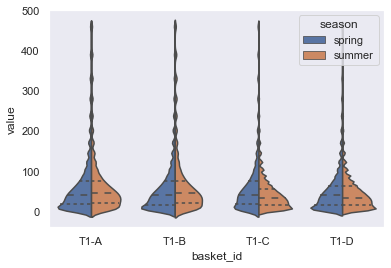

In [53]:
samples['value'] = samples['value'].astype(float)
# draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=samples, x="basket_id", y="value", hue="season",
                split=True, inner="quart", fill=False)
plt.show

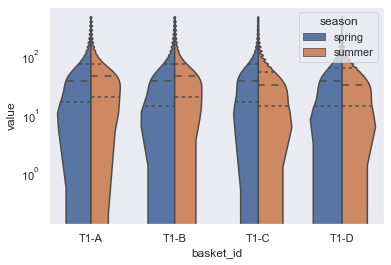

In [28]:
# draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(data=samples, x="basket_id", y="value", hue="season",
                    split=True, inner="quart", fill=False)
ax.set_yscale('log')
plt.show()

(-20.0, 300.0)

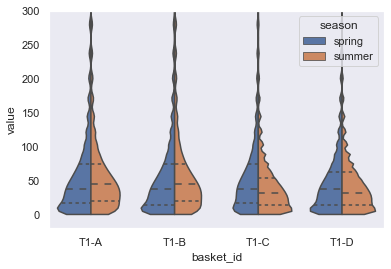

In [35]:
# draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(data=samples, x="basket_id", y="value", hue="season",
                    split=True, inner="quart", fill=False, cut=0)
ax.set_ylim(-20, 300)

In [33]:
normalize 

value          0.37
basket_id      T1-A
season       spring
dtype: object

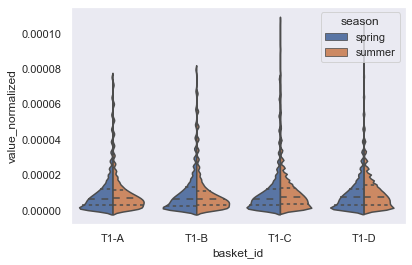

In [42]:
# Calculate the total weight for each sample
total_weights = samples.groupby(['basket_id', 'season'])['value'].sum()

# Normalize the 'value' column by the total weight
samples['value_normalized'] = samples.apply(lambda row: row['value'] / total_weights[(row['basket_id'], row['season'])], axis=1)

# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(data=samples, x="basket_id", y="value_normalized", hue="season",
                    split=True, inner="quart", fill=False)

plt.show()

In [41]:
# Calculate the total weight for each sample
total_weights = samples.groupby(['basket_id', 'season'])['value'].sum()